In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from scipy import stats
from scipy.stats import norm
%matplotlib inline
import math

In [2]:
EyeQ = pd.read_csv('nope.csv')
Spire = pd.read_csv('Cantsay.csv')

In [3]:
EyeQ.shape

(15297, 17)

In [4]:
# EyeQ.dtypes

In [5]:
Spire.shape

(8709, 9)

In [6]:
Spire.columns

Index(['DCC_BUSN_ENTTY_NM', 'EQPMT_LOC_RPRTNG_ID', 'EQPMT_TX_ID', 'TRANS_DATE',
       'TRANS_TIME', 'RCPE_NM', 'PROD_LNM', 'INGRDNT_NM',
       'INVEN_TX_CMPNT_QTY'],
      dtype='object')

In [7]:
total = EyeQ.isnull().sum().sort_values(ascending=False)
percent = (EyeQ.isnull().sum()/EyeQ.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(5)

,Total,Percent
sad,13995,91.488527
anger,10064,65.790678
gender,6842,44.727724
happy,4999,32.679610
y,0,0.000000


This Gender issue is a  problem- that's 45% missing gender. it looks like they took out the surprise category altogether

In [8]:
total = Spire.isnull().sum().sort_values(ascending=False)
percent = (Spire.isnull().sum()/Spire.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(3)

,Total,Percent
INGRDNT_NM,8709,100.0
PROD_LNM,8709,100.0
INVEN_TX_CMPNT_QTY,0,0.0


two completely empty columns- just planning on dropping them

In [9]:
# EyeQ_corr = EyeQ.corr()
# sns.heatmap(EyeQ_corr)

In [10]:
# Spire_corr = Spire.corr()
# sns.heatmap(Spire_corr)

In [11]:
# EyeQ.happy.describe()

In [12]:
# EyeQ.sad.describe()

In [13]:
# EyeQ.anger.describe()

In [14]:
# EyeQ.age.describe()

In [15]:
print("kurtosis: %f" % EyeQ['age'].kurt())
print('skewness: %f' % EyeQ['age'].skew())

kurtosis: -0.196000
skewness: 0.556557


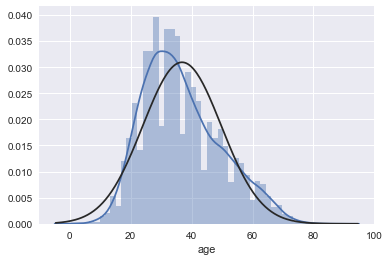

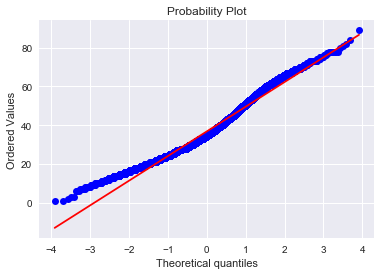

In [16]:
sns.distplot(EyeQ['age'], fit=norm);
fig = plt.figure()
res = stats.probplot(EyeQ['age'], plot=plt)

age has a fairly normal distribution, it's a bit weak on the lower end but that's to be expected as there's probably not too many 4 year olds ordering drinks

In [17]:
# EyeQ.gender.describe()

In [18]:
EyeQ['capture_time'] = pd.to_datetime(EyeQ['capture_time'])

In [19]:
EyeQ['local_time'] = pd.to_datetime(EyeQ['local_time'])

In [20]:
Spire['DateTime'] = pd.to_datetime(Spire['TRANS_DATE'] + ' ' + Spire['TRANS_TIME'])

In [21]:
EyeQ['local_time'].min()

Timestamp('2017-07-23 15:44:53')

In [22]:
Spire['DateTime'].min()

Timestamp('2017-09-27 01:52:40')

In [23]:
EyeQ['local_time'].max()

Timestamp('2017-10-27 15:02:16')

In [24]:
Spire['DateTime'].max()

Timestamp('2017-10-30 21:12:28')

In [25]:
# EyeQ.head(200)

In [26]:
# Spire.head(200)

In [27]:
# Spire.INVEN_TX_CMPNT_QTY.describe()

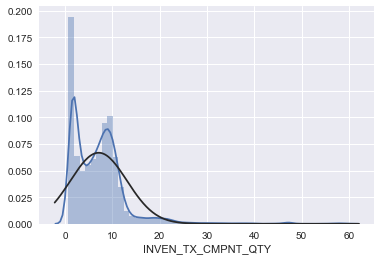

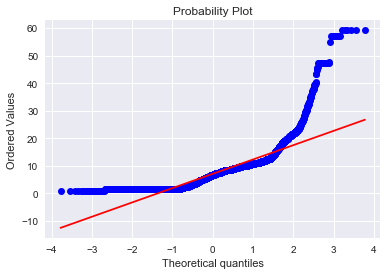

In [28]:
sns.distplot(Spire['INVEN_TX_CMPNT_QTY'], fit=norm);
fig = plt.figure()
res = stats.probplot(Spire['INVEN_TX_CMPNT_QTY'], plot=plt)

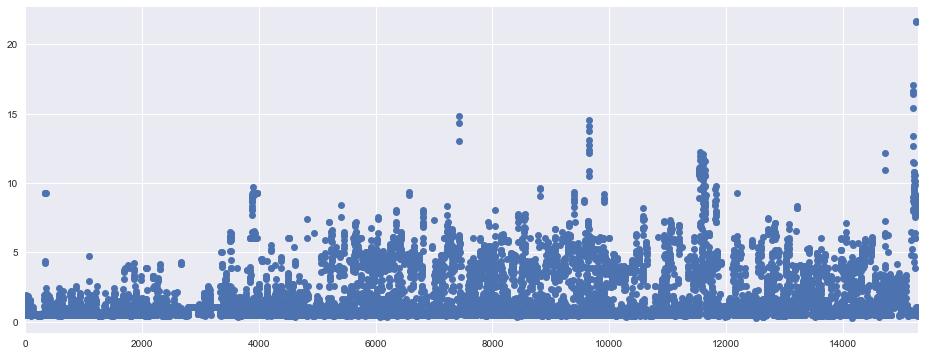

In [29]:
EyeQ['face_size'].plot(figsize=(16, 6), style='o')

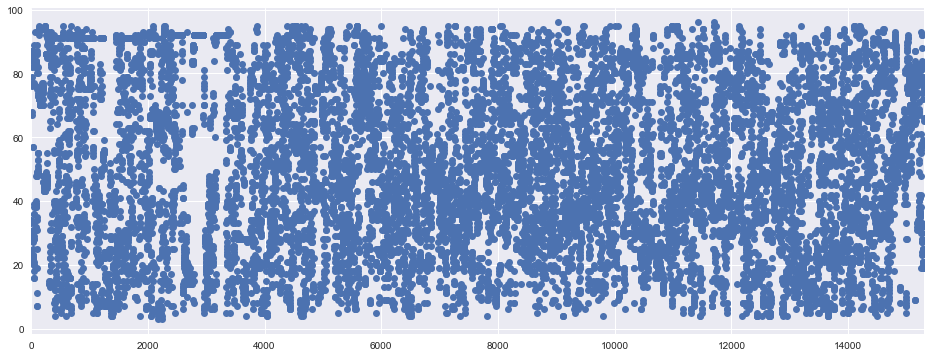

In [30]:
EyeQ['x'].plot(figsize=(16, 6), style='o')

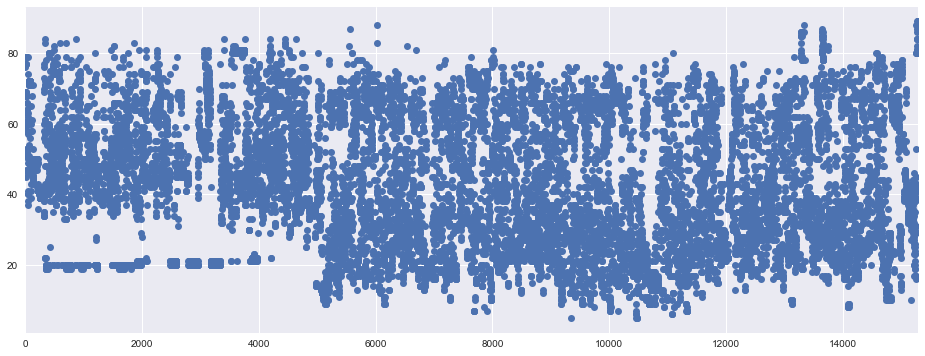

In [31]:
EyeQ['y'].plot(figsize=(16, 6), style='o')

In [32]:
# import cProfile

In [33]:
# import bayesian_changepoint_detection.offline_changepoint_detection as offcd
# from functools import partial

In [34]:
# Q, P, Pcp = offcd.offline_changepoint_detection(EyeQ['x'], partial(
#     offcd.const_prior,  l=(len(EyeQ['x'])+1)
# ),offcd.gaussian_obs_log_likelihood, truncate=-10)

ok, so this is changepoint detection. It supposedly identifies when the probability distribution of a time series changes. The problem is that it's not successfully completed after 2+ hours. may need to look into a simpler model

In [35]:
# from fbprophet import Prophet

In [36]:
changepoints_pre = EyeQ[['x', 'y']].copy()

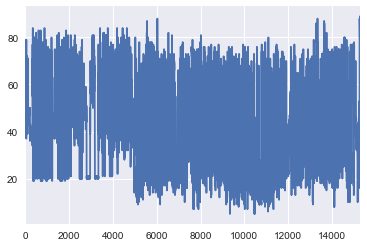

In [37]:
changepoints_pre.y.plot()

In [39]:
# from sklearn.cluster import KMeans

In [82]:
nq = EyeQ.drop('u_id', axis=1)

In [83]:
# nq = nq.set_index(pd.DatetimeIndex(nq['local_time'],inplace=True))
# nq = nq.sort_index()

In [84]:
nq = nq.sort_values('local_time')

In [85]:
# nq.set_index('capture_time', drop=True, append=False, inplace=True, verify_integrity=False)
# nq = nq.sort_index()

In [86]:
# nq = nq.drop('f_count', axis=1)
# nq = nq.drop('anger', axis=1)
# nq = nq.drop('gender', axis=1)
# nq = nq.drop('happy', axis=1)
# nq = nq.drop('p_count', axis=1)
# nq = nq.drop('sad', axis=1)
# nq = nq.drop('capture_time', axis=1)
#nq = nq.drop('local_time', axis=1)

In [87]:
# nq

this is super slow- need an estimate of how many actual users to cluster by.

# rough version of event detection

time series- ok, so looking at the data it's probably safe to assume that the camera documents a person in front of the machine every second that they are there. so if there's a gap of more than 2 seconds, it's probably safe to assume that there is a new user present. this approach will double up the groups where there are several people present in front of the machine which is probably the right thing to do- at least for now.

x and y axis- try and do the same for these? idk

In [47]:
# def countuser(df, var, amt):
#     usernumb = 0
#     for i in range(1, len(df)):
#         if abs(df.var.loc[i] df.var.loc[i-1]) >

In [89]:
nq['time_diff'] = nq['local_time'].diff()

In [90]:
nq['time_diff'] = nq['time_diff'].dt.total_seconds()

In [91]:
nq['time_diff'].describe()

count    1.529600e+04
mean     5.420922e+02
std      4.050605e+04
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.002180e+06
Name: time_diff, dtype: float64

In [53]:
# nq['time_diff'].isnull()

In [92]:
nq['time_diff'] = nq['time_diff'].fillna(0)

In [55]:
# total = nq.isnull().sum().sort_values(ascending=False)
# percent = (nq.isnull().sum()/nq.isnull().count()*100).sort_values(ascending=False)
# missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing.head(5)

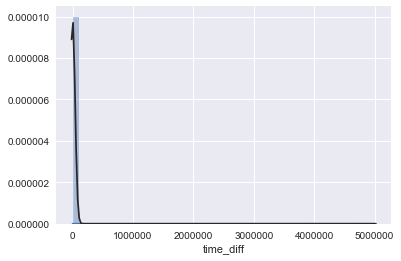

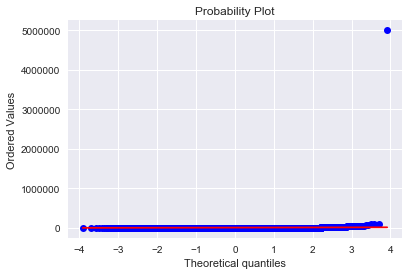

In [56]:
sns.distplot(nq['time_diff'], fit=norm);
fig = plt.figure()
res = stats.probplot(nq['time_diff'], plot=plt)

In [93]:
nq['Event'] = (nq["time_diff"] > 2).cumsum() + 1

In [94]:
nq['Event@1sec'] = (nq['time_diff'] > 1).cumsum() + 1

In [95]:
nq['Event'].max()

3577

In [96]:
nq['Event@1sec'].max()

4106

In [97]:
nq['Event@3sec'] = (nq['time_diff'] > 3).cumsum() + 1

In [98]:
nq['Event@3sec'].max()

3264

In [99]:
nq['Event@3sec'].min()

1

In [64]:
# nq['Event@15sec'] = (nq['time_diff']<-15).cumsum() + 1

In [65]:
# nq['Event@15sec'].max()

In [66]:
(3576 + 4105 + 3263)/3

3648.0

In [1]:
# nq.head()
# group by time stamp, round, take first element

In [69]:
# nq['capture_time'].groupby(pd.TimeGrouper('20S').head()

In [70]:
#nq time- 2017-07-23 & 2017-10-27 
#spire time - 2017-09-27 & 2017-10-30

In [71]:
8709/3577

2.4347218339390553

In [72]:
12*5

60

In [73]:
3577/60

59.61666666666667

In [101]:
Spire['time_diff'] = Spire['DateTime'].diff()

In [102]:
Spire['time_diff'] = Spire['time_diff'].dt.total_seconds()

In [103]:
Spire['time_diff'] = Spire['time_diff'].fillna(0)

In [104]:
# Spire = Spire.set_index('DateTime')
# Spire = Spire.sort_index()

In [105]:
Spire['Event'] = (Spire["time_diff"] > 15).cumsum() + 1

In [106]:
Spire['Event'].max()

5063

In [2]:
# Spire.tail()

In [81]:
# Spire.drop('DCC_BUSN_ENTTY_NM', axis=1)

In [82]:
# Spire.dtypes

In [83]:
nq.to_csv('nq.csv')

In [84]:
Spire.to_csv('Spire.csv')

# setting event to index, dropping all rows except first for event, setting time as index, then resampling into 20 second boxes

In [85]:
spire_event = Spire.set_index('Event')

In [86]:
spire_event = spire_event.groupby('Event').min()

In [87]:
spire_event = spire_event.set_index((pd.DatetimeIndex(spire_event['DateTime'])))

In [88]:
spire_event.columns

Index(['DCC_BUSN_ENTTY_NM', 'EQPMT_LOC_RPRTNG_ID', 'EQPMT_TX_ID', 'TRANS_DATE',
       'TRANS_TIME', 'RCPE_NM', 'PROD_LNM', 'INGRDNT_NM', 'INVEN_TX_CMPNT_QTY',
       'DateTime', 'time_diff'],
      dtype='object')

In [89]:
Eye_event = nq.set_index('Event')

In [90]:
Eye_event = Eye_event.groupby('Event').min()

In [91]:
# Eye_event

In [92]:
Eye_event = Eye_event.set_index((pd.DatetimeIndex(Eye_event['local_time'])))

In [93]:
Eye_event.index.dtype

dtype('<M8[ns]')

In [94]:
min20_summary_spire = spire_event['TRANS_DATE'].resample('20Min').count()

In [95]:
sec20_spire = spire_event['TRANS_DATE'].resample('20S').count()

In [96]:
# sec20_spire

In [143]:
sec5_spire = spire_event['TRANS_DATE'].resample('5S').count()

In [97]:
min20_summary_eye = Eye_event['Event@1sec'].resample('20min').count()

In [98]:
sec20_eye = Eye_event['Event@1sec'].resample('20S').count()

In [144]:
sec5_eye = Eye_event['Event@1sec'].resample('5S').count()

In [99]:
min20_summary_eye.describe()

count    6911.000000
mean        0.517581
std         2.656603
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        62.000000
Name: Event@1sec, dtype: float64

In [100]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/bdbrunson/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [101]:
from dtw import dtw
from scipy.stats import norm

# adjusting the two time series to be of equal length, then running cross correlation and computing shift

In [102]:
x = sec20_eye

In [103]:
y = sec20_spire

In [104]:
x = x.loc['2017-09-27 01:52:40':]

In [145]:
x5 = sec5_eye

In [146]:
y5 = sec5_spire

In [3]:
# x.head()

In [4]:
# y.head()

In [5]:
# x.tail()

In [108]:
y = y.loc[:'2017-10-27 15:02:00']

In [149]:
x5 = x5.loc['2017-09-27 01:52:40':]

In [151]:
y5 = y5.loc[:'2017-10-27 15:02:05']

In [161]:
x5start = x5.loc[:'2017-09-30 01:52:40']

In [162]:
y5start = y5.loc[:'2017-09-30 01:52:40']

In [163]:
x5end = x5.loc['2017-10-24 15:02:05':]

In [164]:
y5end = y5.loc['2017-10-24 15:02:05':]

In [6]:
# y5.tail()

In [110]:
Xstart= x.loc[:'2017-09-30 01:52:40']

In [7]:
# Xstart.tail()

In [112]:
Xend = x.loc['2017-10-24 15:02:00':]

In [113]:
Ystart = y.loc[:'2017-09-30 01:52:40']

In [114]:
Yend = y.loc['2017-10-24 15:02:00':]

computing time shift for the first 3 days (at 20 second units so 20 seconds times 180 gives us the shift for start)

In [129]:
compute_shift(Xstart,Ystart)

180

In [130]:
zstart = cross_correlation_using_fft(Xstart,Ystart)

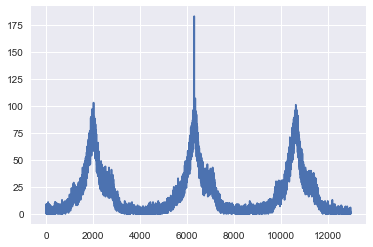

In [131]:
plt.plot(zstart)

computing time shift for the last 3 days

In [132]:
compute_shift(Xend,Yend)

182

In [133]:
zend = cross_correlation_using_fft(Xend,Yend)

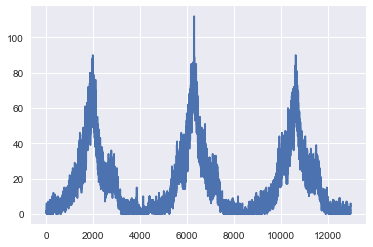

In [134]:
plt.plot(zend)

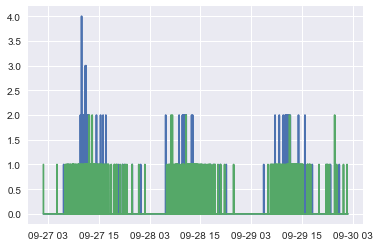

In [121]:
plot(Xstart)
plot(Ystart)

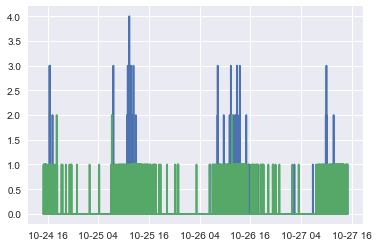

In [122]:
plt.plot(Xend)
plt.plot(Yend)

set a function to find minimal distance for the fastdtw

In [123]:
x.describe()

count    131969.000000
mean          0.021687
std           0.176732
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: Event@1sec, dtype: float64

In [124]:
# from scipy.spatial.distance import euclidean
# from fastdtw import fastdtw

In [125]:
# distance, path = fastdtw(x, y, dist= euclidean)

In [126]:
# print(distance)

In [127]:
# plot(path)

this is my cross correlation function- it's what i used to calculate the amount of stagger between the two time shifts

In [202]:
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2, fftshift
 
def cross_correlation_using_fft(x, y):
    f1 = fft(x)
    f2 = fft(np.flipud(y))
    cc = np.real(ifft(f1 * f2))
    return fftshift(cc)
 
# shift &lt; 0 means that y starts 'shift' time steps before x 
# shift &gt; 0 means that y starts 'shift' time steps after x
def compute_shift(x, y):
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return shift

borrowed from http://lexfridman.com/fast-cross-correlation-and-time-series-synchronization-in-python/

In [104]:
z = cross_correlation_using_fft(x,y)

overall time shift for the data (20 second units)

In [105]:
compute_shift(x,y)

181

overall time shift for the data (5 second units)

In [152]:
compute_shift(x5,y5)

722

time shift for first 3 days (5 second units)

In [165]:
compute_shift(x5start,y5start)

721

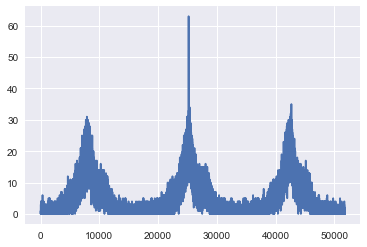

In [167]:
plt.plot(cross_correlation_using_fft(x5start,y5start))

time shift last 3 days (5 second units)

In [166]:
compute_shift(x5end,y5end)

727

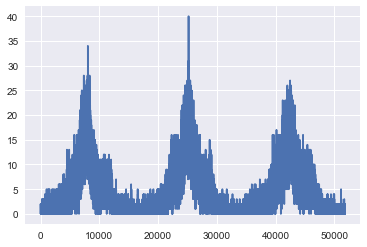

In [168]:
plt.plot(cross_correlation_using_fft(x5end,y5end))

In [156]:
z5 = cross_correlation_using_fft(x5,y5)

In [250]:
# x5.describe

In [249]:
# def shifty(daterange):
#     for i in daterange:
#         return compute_shift(x5[i], y5[i])

# looking at time shift for each individual day

In [218]:
compute_shift(x5['2017-09-28'], y5['2017-09-28'])

722

In [219]:
compute_shift(x5['2017-09-29'], y5['2017-09-29'])

721

In [220]:
compute_shift(x5['2017-09-30'], y5['2017-09-30'])

724

In [222]:
compute_shift(x5['2017-10-01'], y5['2017-10-01'])

722

In [223]:
compute_shift(x5['2017-10-02'], y5['2017-10-02'])

722

In [224]:
compute_shift(x5['2017-10-03'], y5['2017-10-03'])

722

In [225]:
compute_shift(x5['2017-10-04'], y5['2017-10-04'])

722

In [226]:
compute_shift(x5['2017-10-05'], y5['2017-10-05'])

722

In [227]:
compute_shift(x5['2017-10-06'], y5['2017-10-06'])

722

In [228]:
compute_shift(x5['2017-10-07'], y5['2017-10-07'])

724

In [229]:
compute_shift(x5['2017-10-08'], y5['2017-10-08'])

723

In [230]:
compute_shift(x5['2017-10-09'], y5['2017-10-09'])

724

In [231]:
compute_shift(x5['2017-10-10'], y5['2017-10-10'])

723

In [232]:
compute_shift(x5['2017-10-11'], y5['2017-10-11'])

723

In [233]:
compute_shift(x5['2017-10-12'], y5['2017-10-12'])

723

In [234]:
compute_shift(x5['2017-10-13'], y5['2017-10-13'])

724

what the heck??? is this just due to low number of observations? have to talk to team about this

In [235]:
compute_shift(x5['2017-10-14'], y5['2017-10-14'])

4981

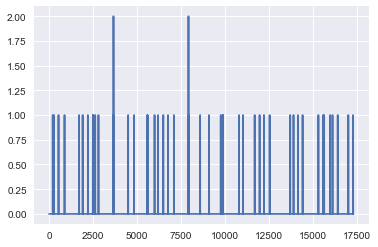

In [252]:
plt.plot(cross_correlation_using_fft(x5['2017-10-14'], y5['2017-10-14']))

In [236]:
compute_shift(x5['2017-10-15'], y5['2017-10-15'])

725

In [237]:
compute_shift(x5['2017-10-16'], y5['2017-10-16'])

724

In [238]:
compute_shift(x5['2017-10-17'], y5['2017-10-17'])

726

In [239]:
compute_shift(x5['2017-10-18'], y5['2017-10-18'])

725

In [240]:
compute_shift(x5['2017-10-19'], y5['2017-10-19'])

724

again, super weird

In [241]:
compute_shift(x5['2017-10-20'], y5['2017-10-20'])

-524

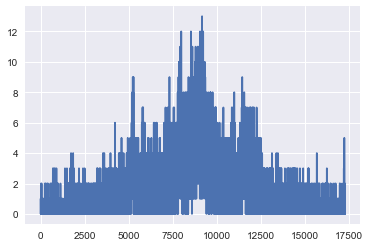

In [254]:
plt.plot(cross_correlation_using_fft(x5['2017-10-20'], y5['2017-10-20']))

In [242]:
compute_shift(x5['2017-10-21'], y5['2017-10-21'])

727

this has to be because of event sparsity and missing camera data

In [243]:
compute_shift(x5['2017-10-22'], y5['2017-10-22'])

5527

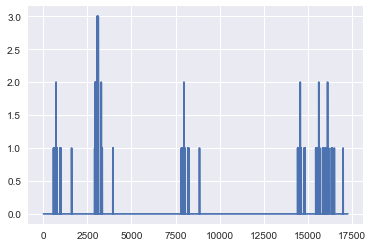

In [255]:
plt.plot(cross_correlation_using_fft(x5['2017-10-22'], y5['2017-10-22']))

In [244]:
compute_shift(x5['2017-10-23'], y5['2017-10-23'])

726

In [245]:
compute_shift(x5['2017-10-24'], y5['2017-10-24'])

860

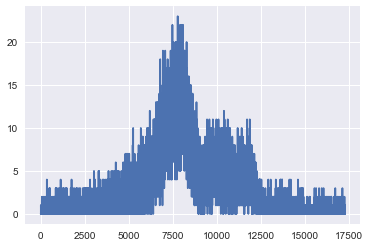

In [256]:
plt.plot(cross_correlation_using_fft(x5['2017-10-24'], y5['2017-10-24']))

In [246]:
compute_shift(x5['2017-10-25'], y5['2017-10-25'])

727

In [247]:
compute_shift(x5['2017-10-26'], y5['2017-10-26'])

826

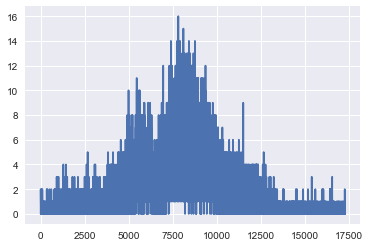

In [257]:
plt.plot(cross_correlation_using_fft(x5['2017-10-26'], y5['2017-10-26']))

In [248]:
compute_shift(x5['2017-10-27'], y5['2017-10-27'])

2012

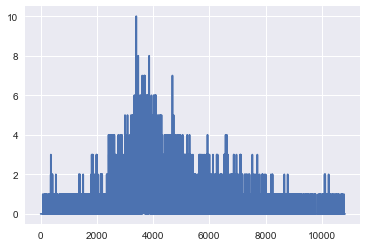

In [258]:
plt.plot(cross_correlation_using_fft(x5['2017-10-27'], y5['2017-10-27']))

In [207]:
len(x5['2017-10-27'])

10826

In [208]:
len(y5['2017-10-27'])

10826

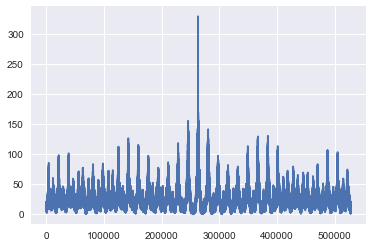

In [157]:
plt.plot(z5)

In [155]:
720*5/60

60.0

In [154]:
60*.166666666666664

9.99999999999984

60 minutes, 20 seconds. because positive y starts 181 time steps after x

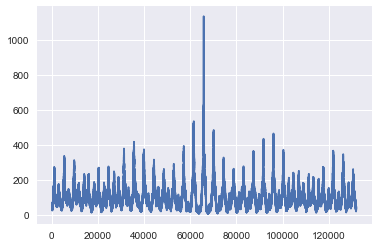

In [106]:
plt.plot(z)

if i'm interpreting this correctly it is extremely likely that this is the right time amount for the time synch

this almost exactly matches the estimate when using 20 min blocks

ok, so this shifted it 3 time steps which would just be an hour (20,40,60 minutes)

next is to retry this but assign the time between events to be something like 20 seconds

@20 seconds it's 1 hr 20 seconds.

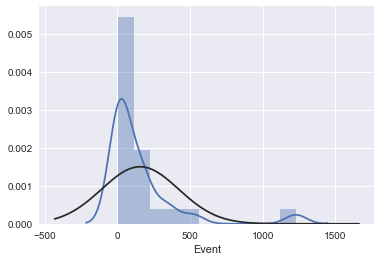

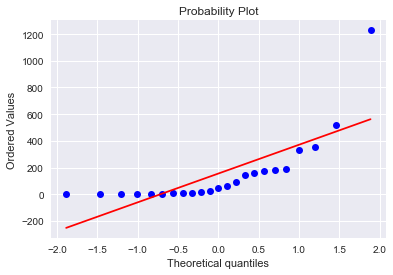

In [93]:
sns.distplot(nq_event, fit=norm);
fig = plt.figure()
res = stats.probplot(nq_event, plot=plt)

How was the Sync.time column calculated in spire_final dataset?
- This was done by calculating the difference between the last record for 21st May 2017 for both the data sets.
- For both the data sets to be in-sync the these time columns (capture time & local time) should match. Since the Spire machine was not synced to any time clock, the time for this data set needs to be corrected

So the Sync-Time for the Spire data is EQPMT_TX_DTM – 1 hour 43 minutes 23 seconds.

# Frechet distance if I want to give it another go.

In [140]:
# Euclidean distance.
def euc_dist(pt1,pt2):
    return math.sqrt((pt2[0]-pt1[0])*(pt2[0]-pt1[0])+(pt2[1]-pt1[1])*(pt2[1]-pt1[1]))

def _c(ca,i,j,P,Q):
    if ca[i,j] > -1:
        return ca[i,j]
    elif i == 0 and j == 0:
        ca[i,j] = euc_dist(P[0],Q[0])
    elif i > 0 and j == 0:
        ca[i,j] = max(_c(ca,i-1,0,P,Q),euc_dist(P[i],Q[0]))
    elif i == 0 and j > 0:
        ca[i,j] = max(_c(ca,0,j-1,P,Q),euc_dist(P[0],Q[j]))
    elif i > 0 and j > 0:
        ca[i,j] = max(min(_c(ca,i-1,j,P,Q),_c(ca,i-1,j-1,P,Q),_c(ca,i,j-1,P,Q)),euc_dist(P[i],Q[j]))
    else:
        ca[i,j] = float("inf")
    return ca[i,j]

""" Computes the discrete frechet distance between two polygonal lines
Algorithm: http://www.kr.tuwien.ac.at/staff/eiter/et-archive/cdtr9464.pdf
P and Q are arrays of 2-element arrays (points)
"""
def frechetDist(P,Q):
    ca = np.ones((len(P),len(Q)))
    ca = np.multiply(ca,-1)
    return _c(ca,len(P)-1,len(Q)-1,P,Q)

# DTW - was reccomended to us but not sure it's right for our problem

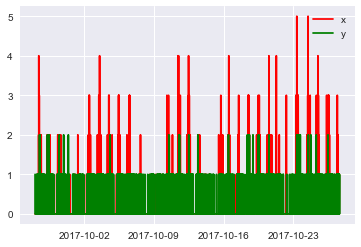

In [147]:
plt.plot(x,'r', label='x')
plt.plot(y, 'g', label='y')
plt.legend();

2d matrix to compute distances between pairs of x and y

In [183]:
distances = np.zeros((len(y5), len(x5)))

In [184]:
distances

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [9]:
# for i in range(len(y5)):
#     for j in range(len(x5)):
#         distances[i,j] = (x5[j]-y5[i])**2

In [138]:
# for i in range(len(y)):
#     for j in range(len(x)):
#         distances[i,j] = (x[j]-y[i])**2 

In [ ]:
distances

In [169]:
# def dist_cost_plot(distances):
#     im = plt.imshow(distances, interpolation='nearest', cmap='Reds') 
#     plt.gca().invert_yaxis()
#     plt.xlabel("X")
#     plt.ylabel("Y")
#     plt.grid()
#     plt.colorbar();

different approach to time warping, borrowed from https://nipunbatra.github.io/blog/2014/dtw.html

In [11]:
# #time warping sound function trial

# import numpy as np
# import matplotlib.pyplot as plt
# from pylab import *

# my_path ='/home/...'
# def time_warping (x,y,fs,name):

#     distances             = np.zeros((len(y), len(x)))
#     accumulated_cost      = np.zeros((len(y), len(x)))
#     accumulated_cost[0,0] = distances[0,0]

#     def distance_cost_plot(distances):
#                 #function to visualize the distance matrix      
#         im = plt.imshow(distances, interpolation='nearest', cmap='Reds') 
#         plt.gca().invert_yaxis()
#         plt.xlabel("X")
#         plt.ylabel("Y")
#         plt.grid()
#         plt.colorbar();
#         #plt.show()
#         plt.close()

#     def path_cost(x, y, accumulated_cost, distances):
#         #this is like mlpy.dtw_std (I gues..)
#         path = [[len(x)-1, len(y)-1]]
#         cost = 0
#         i = len(y)-1
#         j = len(x)-1
#         while i>0 and j>0:
#             if i==0:
#                 j = j - 1
#             elif j==0:
#                 i = i - 1
#             else:
#                 if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
#                     i = i - 1
#                 elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
#                     j = j-1
#                 else:
#                     i = i - 1
#                     j= j- 1
#             path.append([j, i])
#         path.append([0,0])
#         for [y, x] in path:
#             cost = cost +distances[x, y]
#         return path, cost

#     #Here I apply the function over function x and y
#     path, cost = path_cost(x, y, accumulated_cost, distances)   

#     for i in range(len(y)):
#         for j in range(len(x)):
#             distances[i,j] = (x[j]-y[i])**2

#     #Here I plot the distance   
#     g=distance_cost_plot(distances)

#     accumulated_cost      = np.zeros((len(y), len(x)))
#     accumulated_cost[0,0] = distances[0,0]

#     for i in range(1, len(y)):
#         accumulated_cost[i,0] = distances[i, 0] + accumulated_cost[i-1, 0]
#     for i in range(1, len(x)):
#         accumulated_cost[0,i] = distances[0,i] + accumulated_cost[0, i-1] 
#     for i in range(1, len(y)):
#         for j in range(1, len(x)):
#             accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]

#     #empy list for the maping

#     map_x_final   =[]
#     map_y_final   =[]
#     map_x_f_final =[]
#     map_y_f_final =[]

#     paths         = path_cost(x, y, accumulated_cost, distances)[0] #no entiendo la sintaxis de esta linea

#     print('path',paths)
#     print('accumulated_cost',accumulated_cost)
#     print('distances',distances)

#     #print 'paths.shape',path.shape

#     plt.figure(figsize=(14,8)) # 8 plots in one
#     plt.subplot(2,1,1)
#     grid(True)

#     map_x_fx         =[]
#     map_y_fy         =[]        
#     map_y_fy_newlist =[]
#     for [map_x, map_y] in paths:

#         #print map_x, x[map_x], ":", map_y, y[map_y]

#         plt.plot([map_x*float(1)/float(fs), map_y*float(1)/float(fs)], [x[map_x], y[map_y]], 'r')
#         #plt.plot([map_x, map_y], [x[map_x], y[map_y]], 'r')

#         #saving in empy list        

#         map_x_fx.append([map_x,x[map_x]])
#         map_y_fy.append([map_x,y[map_y]])

#         map_x_final.append(map_x)
#         map_y_final.append(map_y)

#         map_x_f_final.append(x[map_x])
#         map_y_f_final.append(y[map_y])

#         dif_a_sumar = (map_y-map_x)*float(1)/float(fs)      

#     map_x_final     = np.asarray(map_x_final)
#     map_y_final     = np.asarray(map_y_final)
#     map_x_f_final   = np.asarray(map_x_f_final)
#     map_y_f_final   = np.asarray(map_y_f_final)

#     ####
#     map_x_final_vec     = np.asarray(map_x_fx)
#     map_y_final_vec     = np.asarray(map_y_fy)

#     #Erase the elements that has been alrady map

#     lista_aux=[]
#     for j,[a,b] in enumerate(map_y_fy):
#         print(j,':', [a,b])
#         print(len( map_x_final[:j]))
#         if a not in map_x_final[:j]:
#             lista_aux.append([a,b])
#         else:
#             pass  
#     print('++++++')
#     print('lista aux len: ',len(lista_aux))

#     map_y_final_vec_    =np.asarray(lista_aux)

#     print('++++')
#     print ('map_y_fy',len(map_y_fy))
#     print('*************************')
#     #print ' a veer map_x_fx: ',map_x_fx
#     #print ' a veer map_x_fx type: ',type(map_x_fx)
#     #print ' map_y_f_final_vec shape',map_y_f_final_vec.shape
#     #print ' a veer map_x_final_vec: ',map_x_final_vec
#     #print ' a veer map_x_final_vec[0]: ',map_x_final_vec[0]
#     print('*************************')
#     print ('x shape',x.shape)
#     print ('y shape',y.shape)
#     print ('map_x_f_final',map_x_f_final.shape)
#     print ('map_y_f_final',map_y_f_final.shape)

#     print ('map_y_final_vec shape',map_y_final_vec.shape)
#     print ('map_y_final_vec_ shape',map_y_final_vec_.shape)
#     print('*************************')

#     #print map_x_final.size, map_y_final.size, map_x_f_final.size, map_y_f_final.size

#     time_x     = np.arange(x.size)*float(1)/float(fs)
#     time_y     = np.arange(y.size)*float(1)/float(fs)
#     time_map_x = np.arange(map_x_f_final.size)*float(1)/float(fs)
#     time_map_y = np.arange(map_y_f_final.size)*float(1)/float(fs)

#     plt.plot(time_x,x, 'bo-',linewidth=1 ,label='funcion target: X ')#'bo-'
#     plt.plot(time_y,y, 'go-',linewidth=1,markersize=3, label = 'funcion a proyectar :Y')#'g^-'

#     plt.legend(fontsize= 'small')       
#     plt.ylabel('Signal')
#     plt.xlabel('time [s]') 
#     plt.subplot(2,1,2) #los graficos mapeados
#     grid(True)

#     plt.plot(time_x,x, 'b',linewidth=1 ,label='funcion target: X sonido-vs')#o-
#     plt.plot(time_y,y, 'g',linewidth=1,markersize=3, label = 'funcion a proyectar :Y sonido-p')#'g^-'

#     plt.plot(map_y_final_vec_[:, 0]*float(1)/float(fs), map_y_final_vec_[:,1],'yo-',markersize=5, label='funcion Y mapeada donde convergen con DTW sobre X')#'m^'
#     plt.ylabel('Signal')
#     plt.xlabel('time [s]')          
#     plt.legend(fontsize= 'small')       
#     figname = "%s.jpg"%('alineado_dtw_'+name)
#     plt.savefig(my_path+figname,dpi=200)    
#     #plt.show()
#     plt.close()
#     mapeo_time      = map_y_final_vec_[:, 0]*float(1)/float(fs)
#     mapeo_amplitude =  map_y_final_vec_[:,1]

#     return mapeo_time, mapeo_amplitude

In [ ]:
think of camera1 is a function of spire1

si = F(ti)  1<i<N
s = G(t) + E     

sooo this is basically back to my dynamic time warping, just using only sqrt n for number of nearest neighbors

drop model complexity for stability

consider wether they resync at the end of the day

# adjusting the datetime

In [ ]:
import datetime


datetime = mydatetime + datetime.timedelta(hours=1, seconds = 10)


difference = abs(some_datetime_A - some_datetime_B)
# difference is now a timedelta object

# there are a couple of ways to do this comparision:
if difference > timedelta(minutes=1):
    print "Timestamps were more than a minute apart"

# or: 
if difference.total_seconds() > 60:
    print "Timestamps were more than a minute apart"

In [ ]:
synchedtime

In [51]:
import datetime

spire lt eyeq, solve by subtracting hour and 10 seconds from spire? this raises issues with the merge since we have time slippage- just going to do it this way for now so can keep working on data, but tian's working on  a better way to do, will pull from his notebook for the next stage of data processing

In [52]:
Spire['synchtime'] = Spire['DateTime'] - datetime.timedelta(hours = 1, seconds = 10)

In [54]:
Spire_merge = Spire.set_index(pd.DatetimeIndex(Spire['synchtime']))

In [56]:
EyeQ_Merge = nq.set_index(pd.DatetimeIndex(nq['local_time']))

In [71]:
data = pd.merge_asof(EyeQ_Merge, Spire_merge, left_on="local_time", right_on="synchtime", tolerance = pd.Timedelta('15S'))

In [12]:
# nq.head(1)

In [73]:
data.to_csv('data.csv')

In [ ]:
# data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
#     lambda x: x.fillna(x.median()))

In [13]:
# nq.head(1)

In [122]:
import scipy

In [123]:
sum_eye = nq.groupby('Event').agg({'local_time': [min, max],      # find the min, max, and sum of the duration column
                                          'age': "mean", # find the number of network type entries
                                          'sad': [min, max],
                                          'happy':[min, max],
                                          'anger': [min,max],
                                         'x': [min, max, 'mean'],
                                         'y': [min, max, 'mean'],
                                         'gender': [(lambda x: scipy.stats.mode(x)[0])]})

In [14]:
# sum_eye

In [125]:
sum_eye.to_csv('SumEye.csv')

In [15]:
# Spire.head(2)

In [135]:
sum_Spire = pd.pivot_table(Spire, index='Event', columns='RCPE_NM', 
                        values='INVEN_TX_CMPNT_QTY', aggfunc=np.sum)

In [137]:
sum_Spire2 = Spire.groupby('Event').agg({'synchtime': [min, max]})

In [16]:
# sum_Spire = sum_Spire.join(sum_Spire2)

In [17]:
# sum_Spire

In [151]:
sum_Spire.to_csv('sum_Spire.csv')

In [155]:
###need to fix name of '(synchtime, min)'
# data = pd.merge_asof(EyeQ_Merge, Spire_merge, left_on="local_time, min", right_on="(synchtime, min)", tolerance = pd.Timedelta('15S'))